# • DOMAIN: Automobile 
# • CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. 
**The vehicle may be viewed from one of many different angles.**
# • DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
**• All the features are numeric i.e. geometric features extracted from the silhouette.**
# • PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler,LabelEncoder
#from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
#from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
#import plotly
#plotly.offline.init_notebook_mode()
#import plotly.graph_objs as go
#import plotly.tools as tls
#import plotly.figure_factory as ff
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTENC
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from statistics import mean
#from tkinter import *
#import tkinter as tk
#from tkinter import ttk
#import pickle
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [3]:
os.chdir('C:\\Users\\VGopalak\\Desktop\\ML\\un-supervised learning')

# Import, Clean and Pre-Process Data

In [62]:
df=pd.read_csv('Part3 - vehicle.csv')

**Data Exploration**

In [63]:
df.head() #sample 5 records.

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

**We can see all details related to vehicle is given.**

In [6]:
df.shape #exploring shape of the dataset

(846, 19)

**We have 846 rows and 19 columns.**

In [7]:
df.columns #exploring column names

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [8]:
df.info() #getting information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

**Missing value check**

In [11]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

**We have very few missing values**

# Data Cleansing

**Missing Value Treatment**

**Filling Missing value with median**

In [64]:
null_col=[]
for i,j in enumerate(df.columns):
    if df.isnull().sum()[i]>0:
        df[j].fillna(df[j].median(),inplace=True)
        null_col.append(j)
    else:
        pass
#print(null_col)

In [13]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

**we have int,float and object datatypes**

In [15]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

**Below variables has high maximum value compared to 75% of data**
- **skewness_about.1,skewness_about,scaled_radius_of_gyration.1,scaled_radius_of_gyration,scaled_variance.1,scaled_variance,max.length_aspect_ratio,pr.axis_aspect_ratio,radius_ratio**

**Scale of the variables are different. We need to do scaling of data.**

**Outliers Treatment**

**Filling ouliers with mean(mean without outliers)**

In [65]:
for c in df.select_dtypes(include=['int64','float64']).columns:
        #getting upper lower quartile values
        q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
        IQR=q75-q25
        Threshold=IQR*1.5
        lower,upper=q25-Threshold,q75+Threshold
        Outliers=[i for i in df[c] if i < lower or i > upper]
        #taking mean of a column without considering outliers
        df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
        mean=int(df_include[c].mean())
        #imputing outliers with mean
        df[c]=np.where(df[c]>upper,mean,df[c])
        df[c]=np.where(df[c]<lower,mean,df[c])
        Outliers=[i for i in df[c] if i < lower or i > upper]

# EDA

# **Univariate Analysis**

**Distribution of numerical variables**

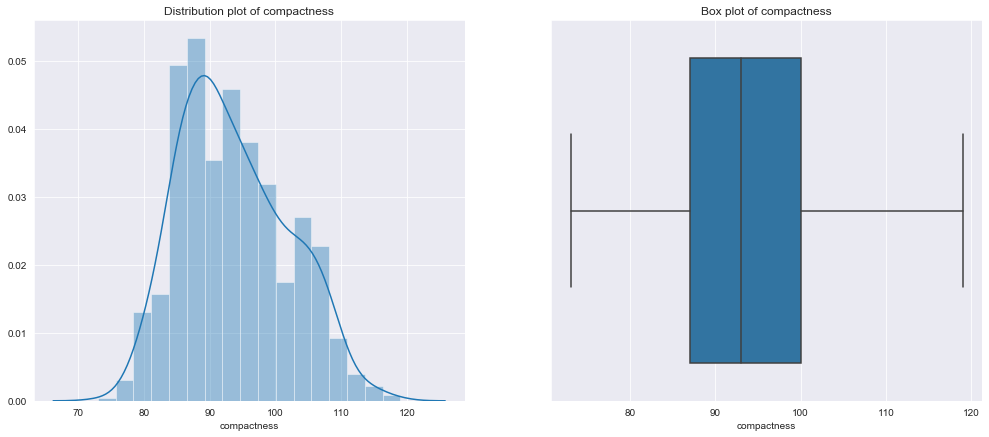

 Total Number of outliers in compactness: 0


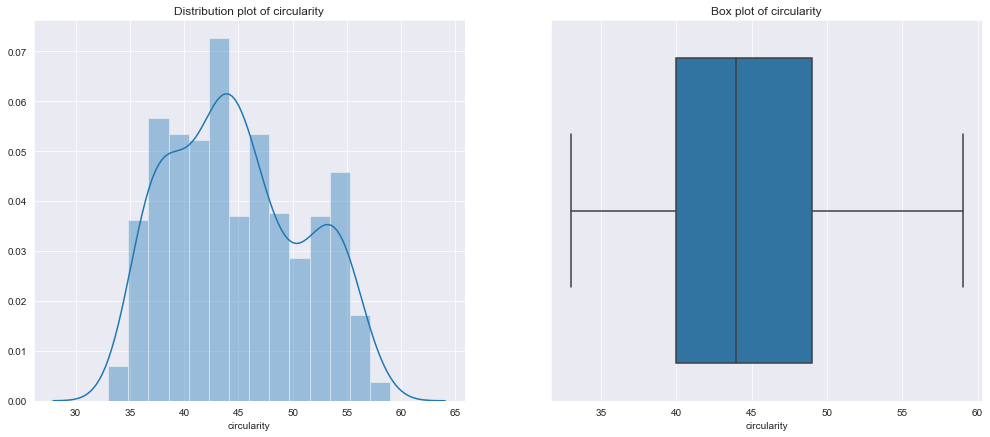

 Total Number of outliers in circularity: 0


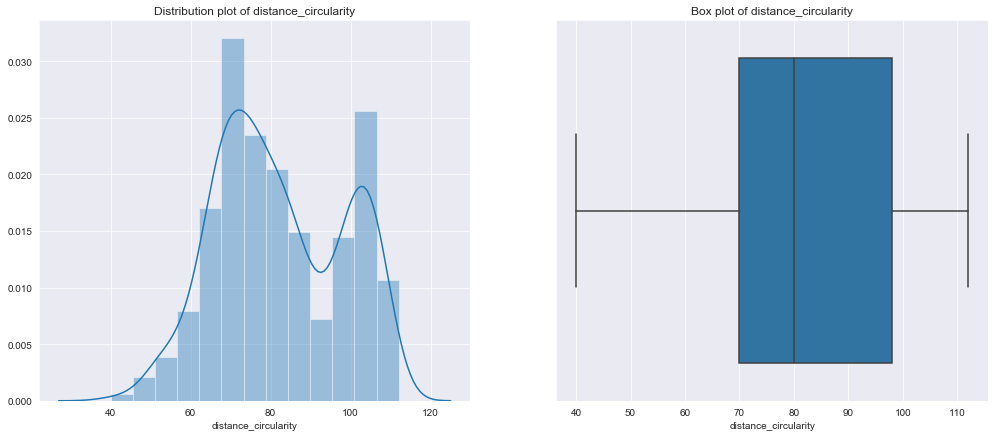

 Total Number of outliers in distance_circularity: 0


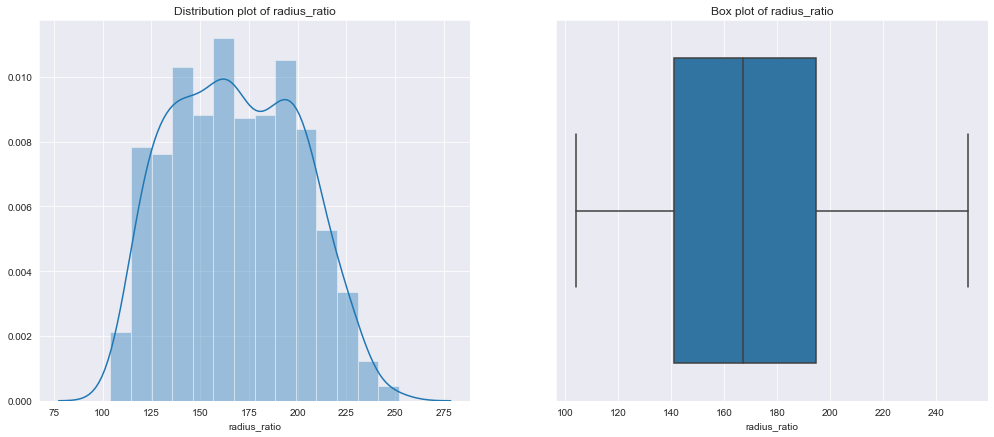

 Total Number of outliers in radius_ratio: 0


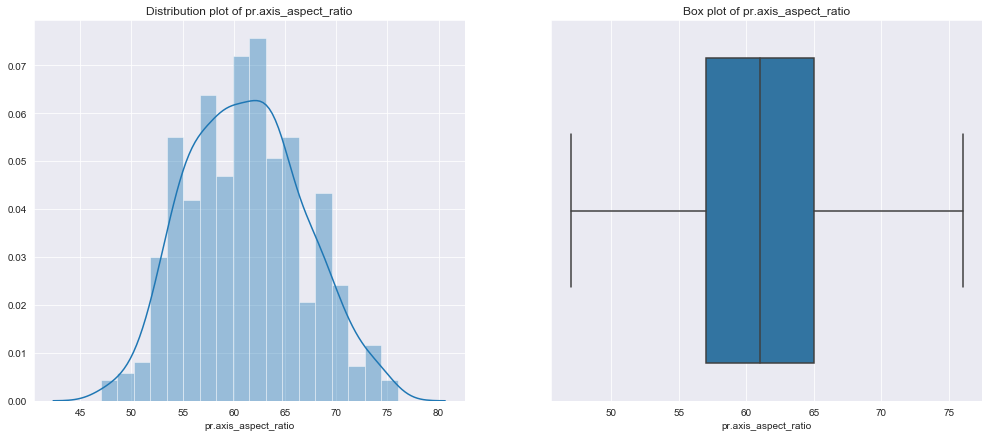

 Total Number of outliers in pr.axis_aspect_ratio: 0


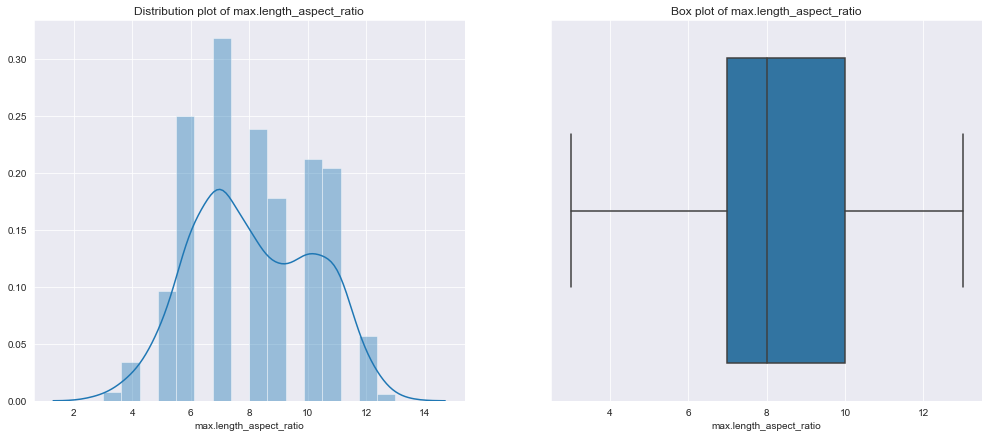

 Total Number of outliers in max.length_aspect_ratio: 0


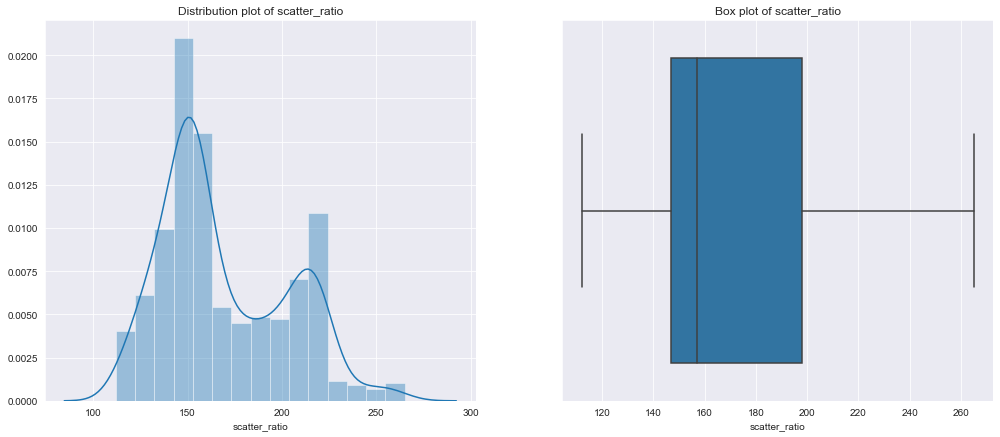

 Total Number of outliers in scatter_ratio: 0


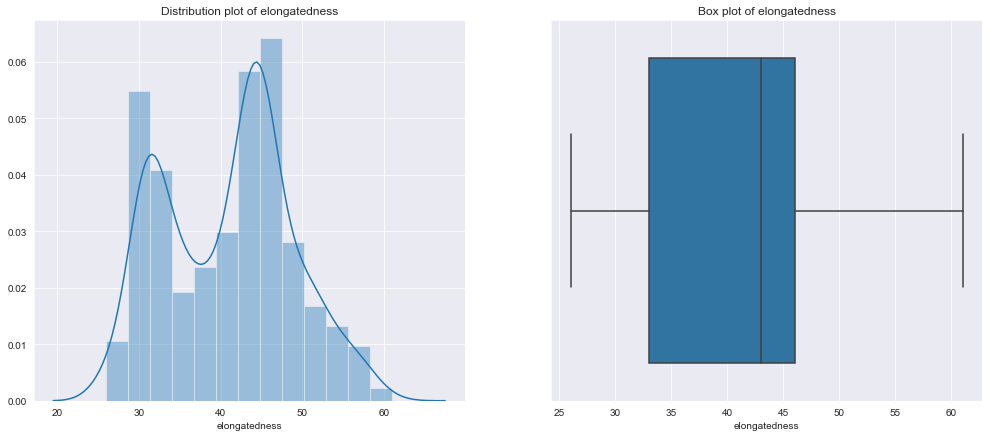

 Total Number of outliers in elongatedness: 0


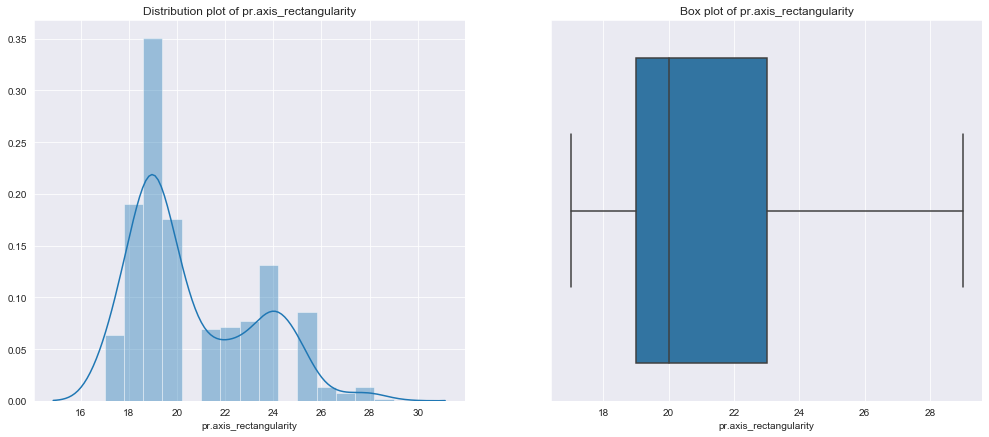

 Total Number of outliers in pr.axis_rectangularity: 0


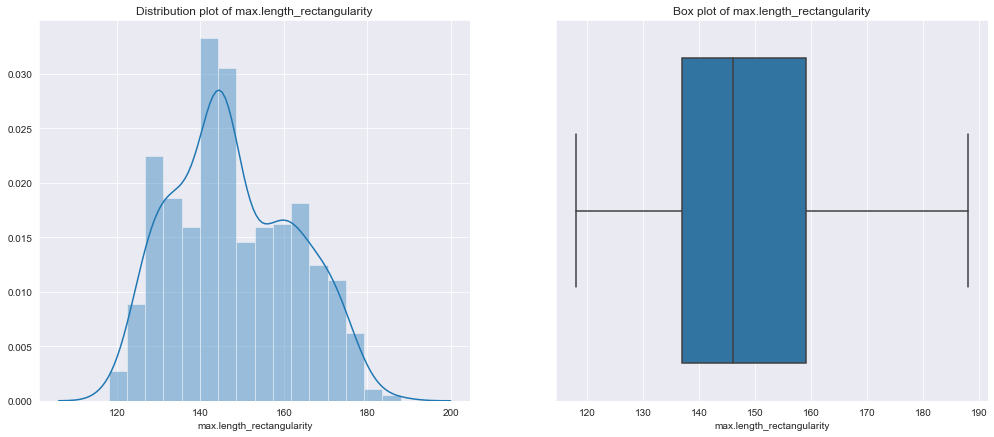

 Total Number of outliers in max.length_rectangularity: 0


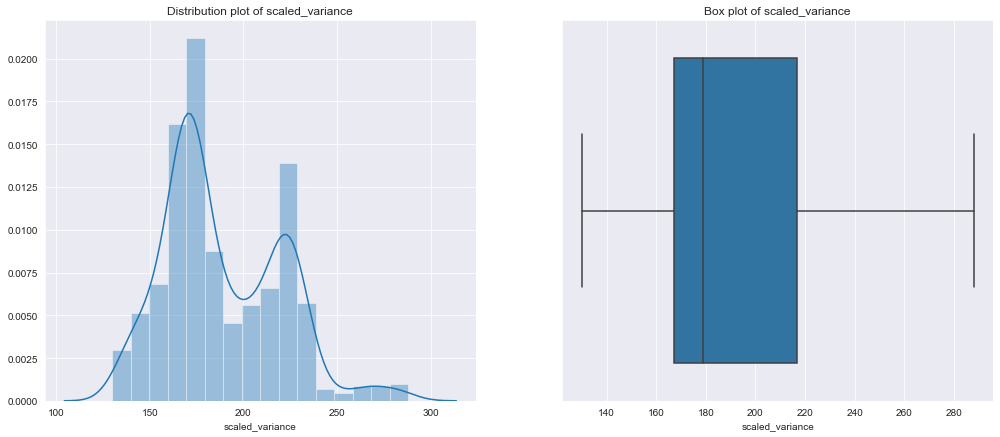

 Total Number of outliers in scaled_variance: 0


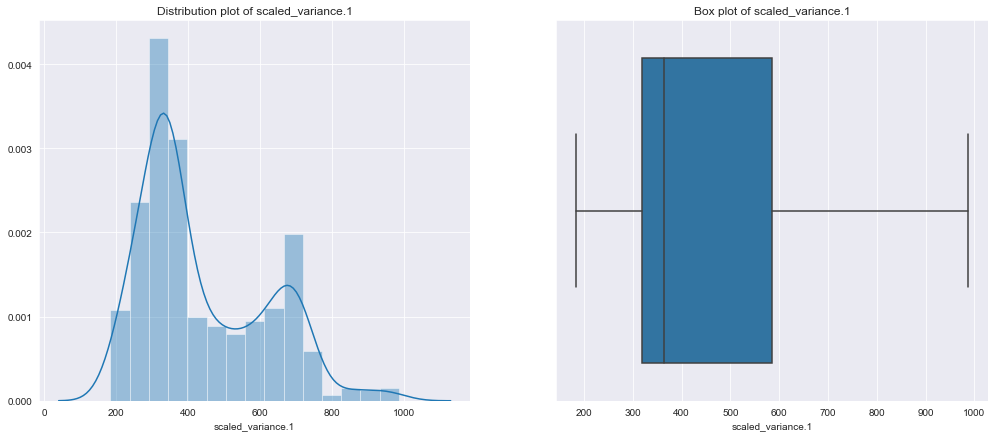

 Total Number of outliers in scaled_variance.1: 0


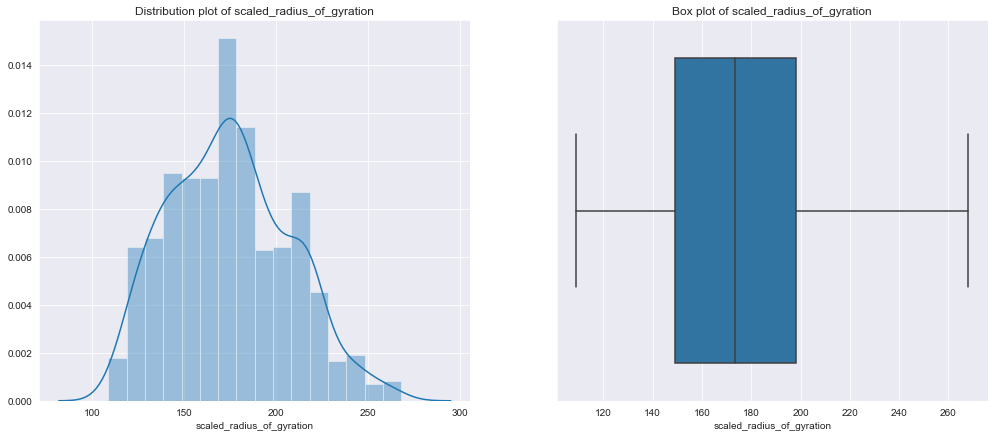

 Total Number of outliers in scaled_radius_of_gyration: 0


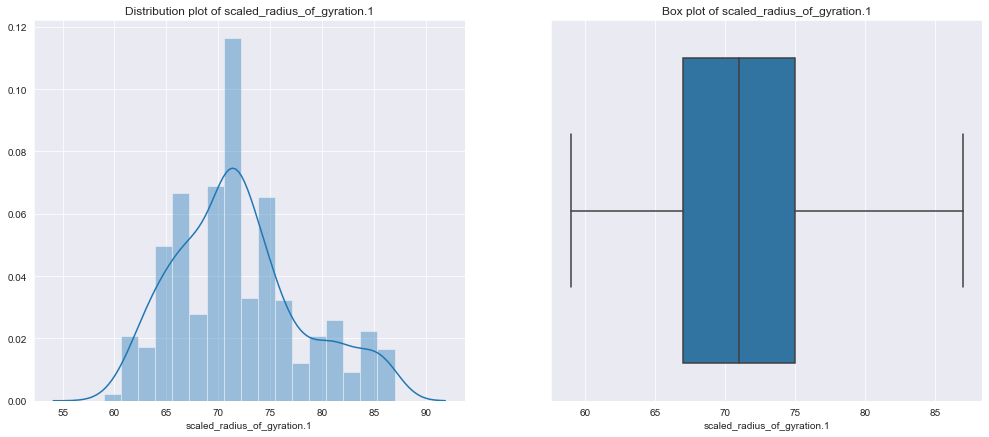

 Total Number of outliers in scaled_radius_of_gyration.1: 0


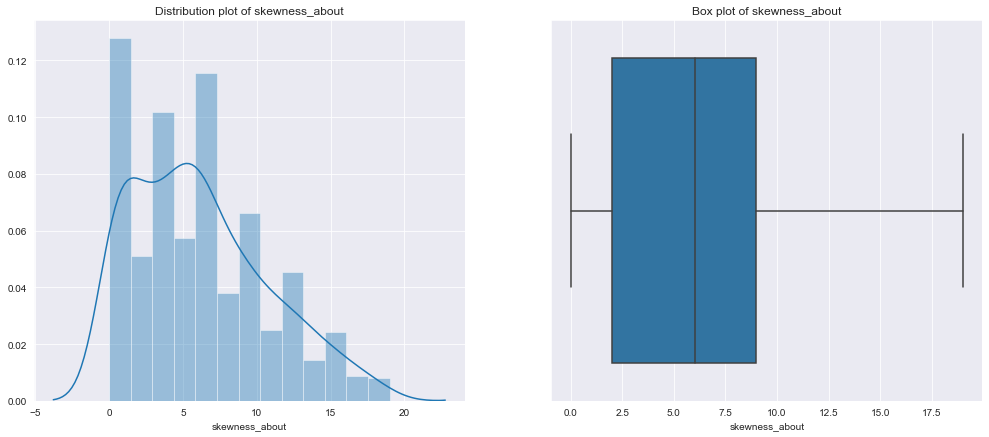

 Total Number of outliers in skewness_about: 0


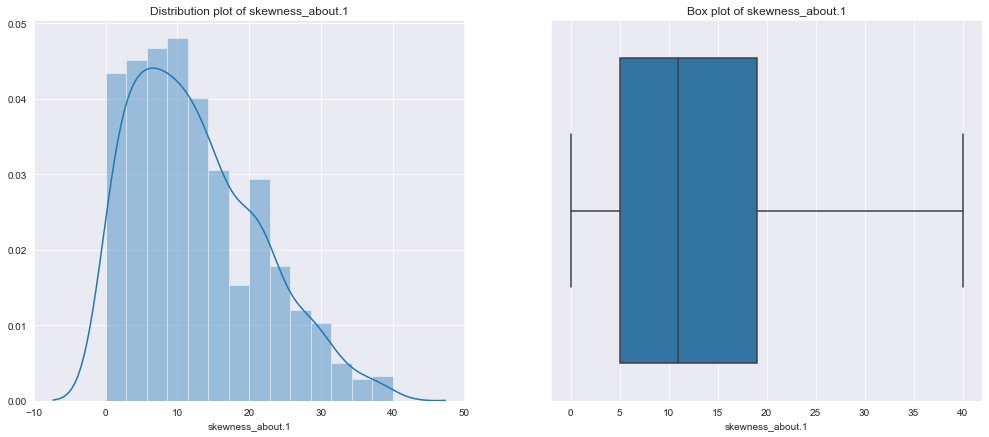

 Total Number of outliers in skewness_about.1: 0


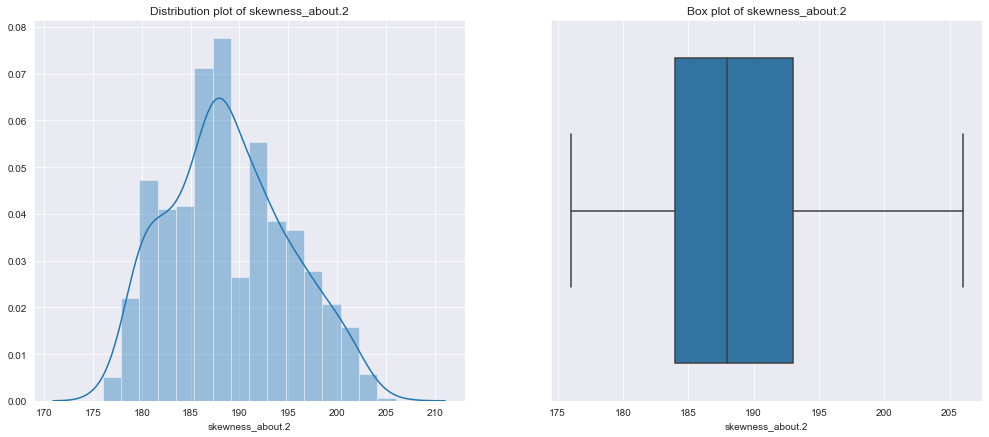

 Total Number of outliers in skewness_about.2: 0


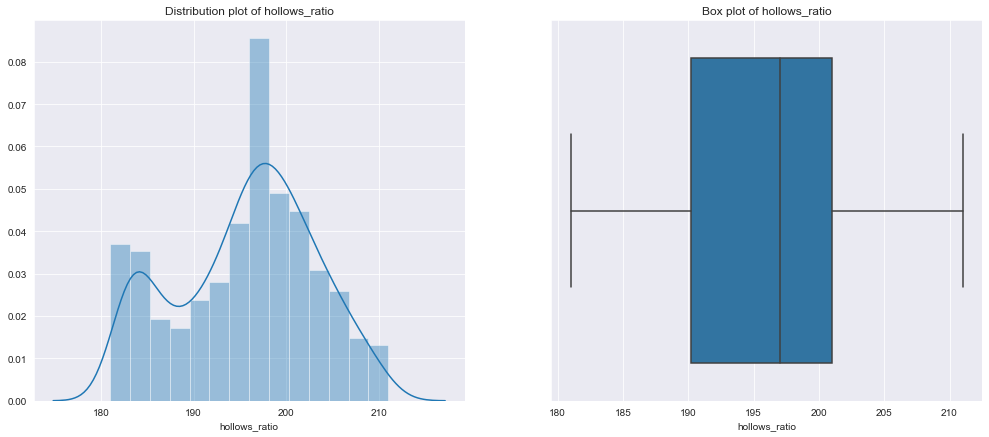

 Total Number of outliers in hollows_ratio: 0


In [17]:
outlier_col=[]
for i in df.select_dtypes(include=['int64','float64']).columns:
    f, axes = plt.subplots(1, 2, figsize=(17,7))
    sns.boxplot(x = i, data=df,  orient='h' , ax=axes[1])
    #sns.set(axis_bgcolor='k')
    sns.distplot(df[i],  ax=axes[0])
    axes[0].set_title('Distribution plot of {}'.format(i))
    axes[1].set_title('Box plot of {}'.format(i))
    plt.show()
    #checking count of outliers.
    q25,q75=np.percentile(df[i],25),np.percentile(df[i],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[i] if i < lower or i > upper]
    if len(Outliers)>0:
        outlier_col.append(i)    
    print('{} Total Number of outliers in {}: {}'.format('\033[1m',i,len(Outliers)))
    

- **Most of the variables have normal distribution.**


- **We can see two kinds of distribution in most of the variables.**


- **Since we hvae handled the outliers there is no outliers exists in data.**



**Correlation between numerical Variables.**

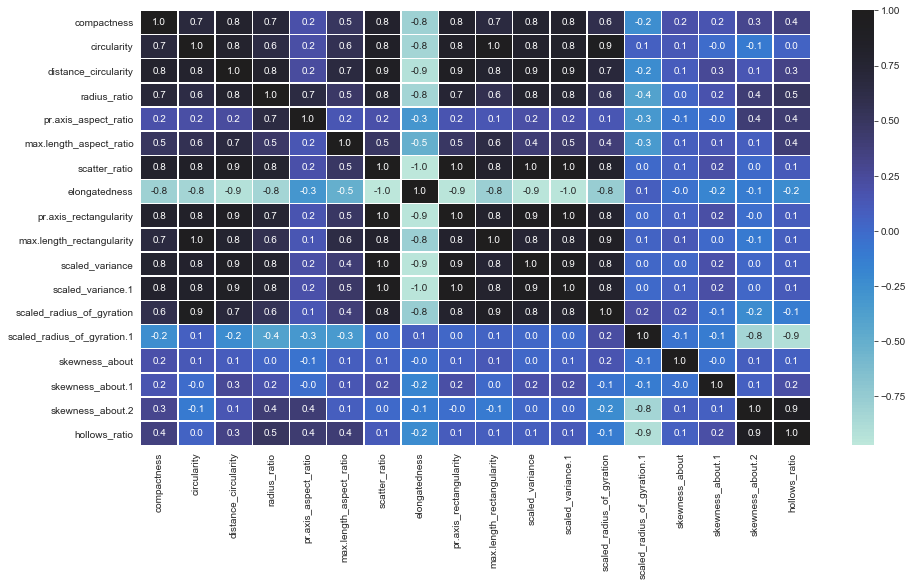

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

- **We can see many variables are coorelated with each other.**


- **We can see few set of variables are even have value as 1**


**Distribution of Target Variable**

In [19]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

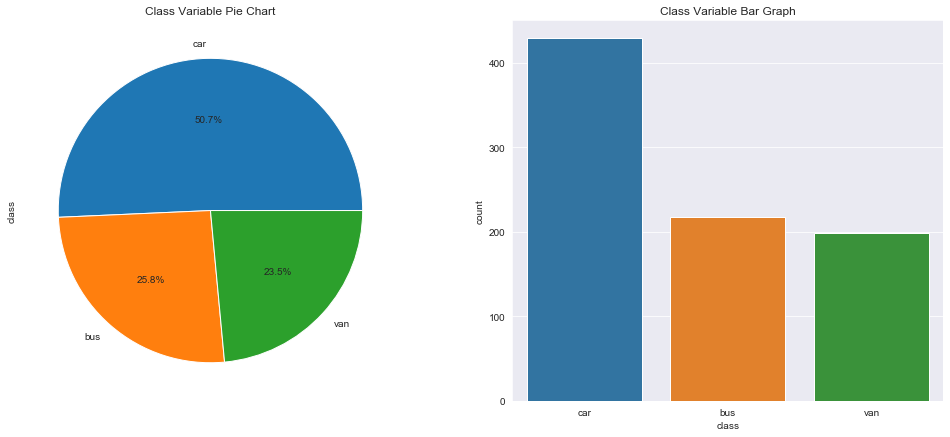

In [20]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('class',data=df,ax=axes[1],order=['car','bus','van'])
axes[0].set_title('Class Variable Pie Chart')
axes[1].set_title('Class Variable Bar Graph')
plt.show()

- **Car distribution is more compared to others.It has 50% of data**


- **Bus and van has nearly equal distribution.**

**Independent variables vs Dependent variables.**

**Checking mean values of each column with respect to target.**

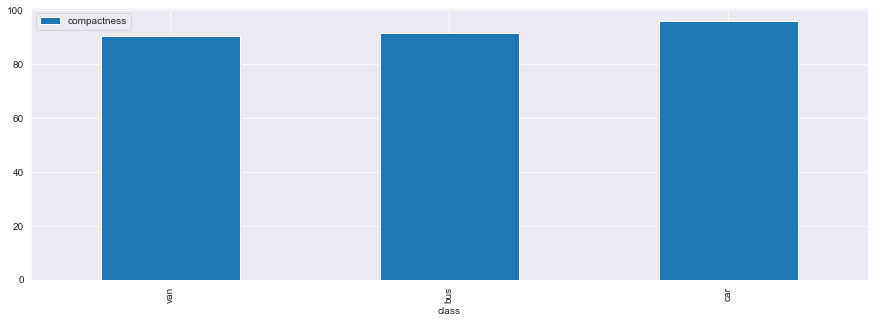

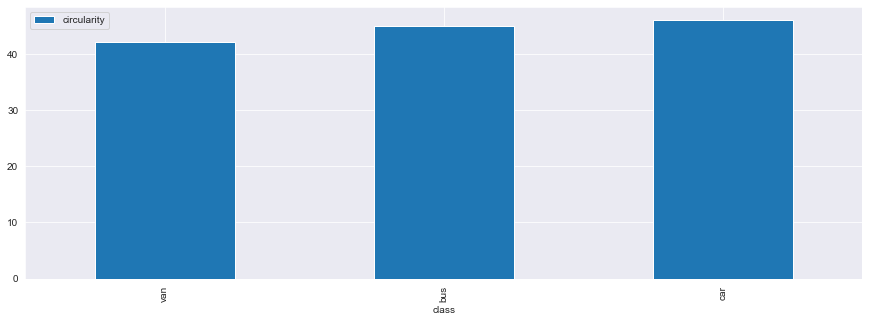

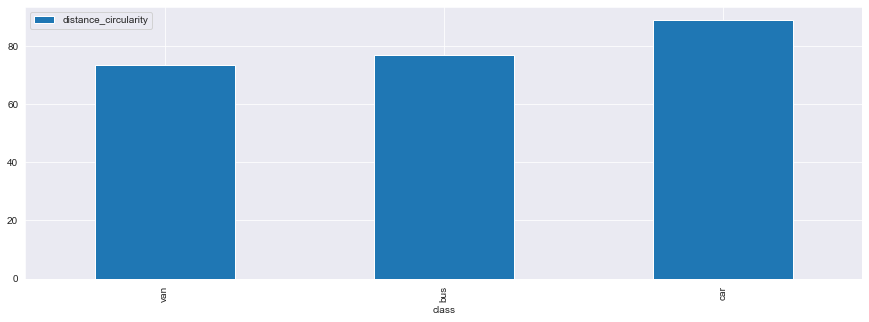

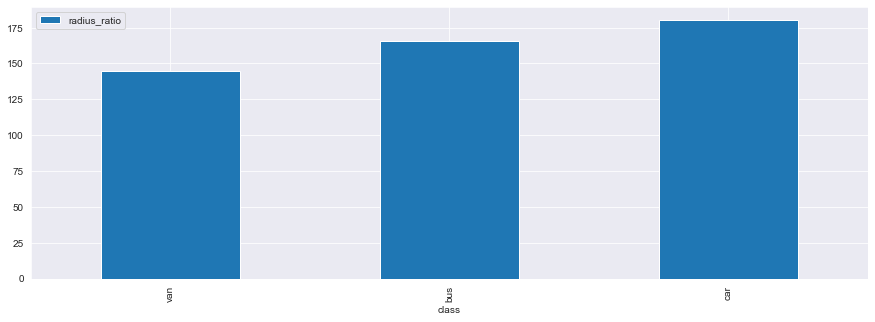

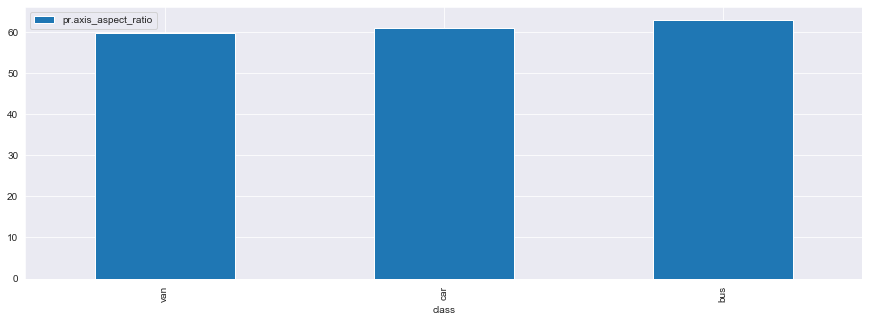

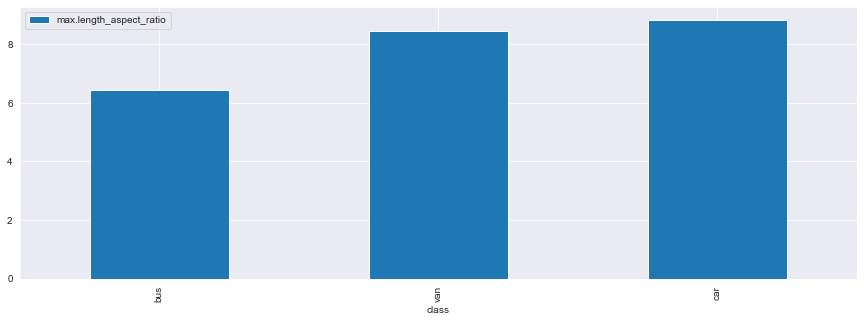

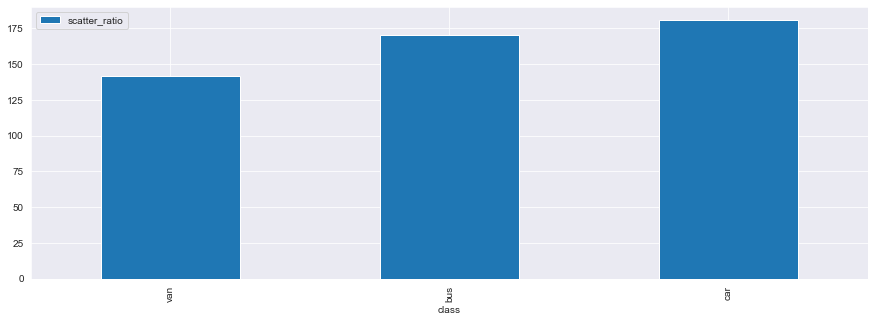

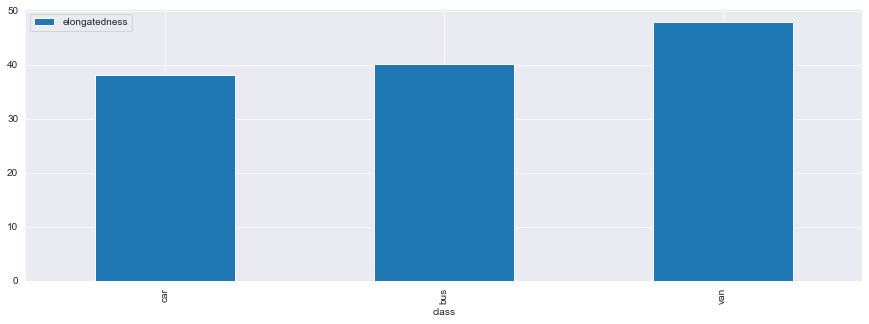

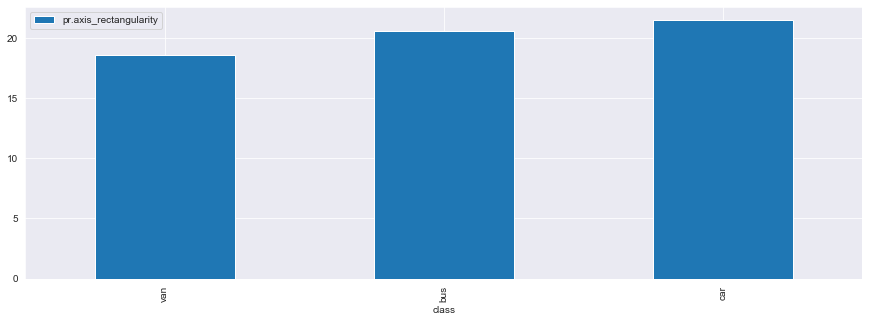

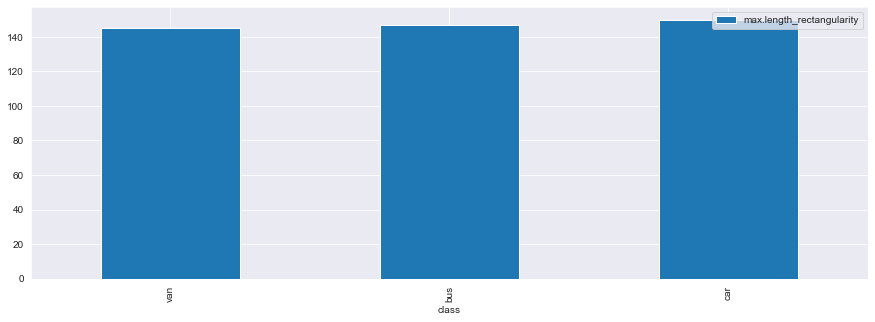

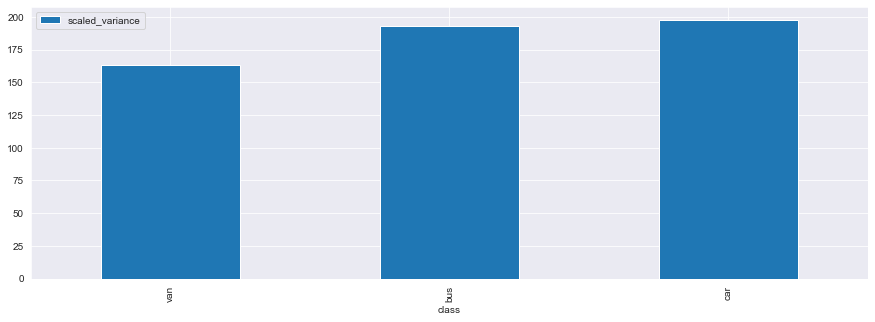

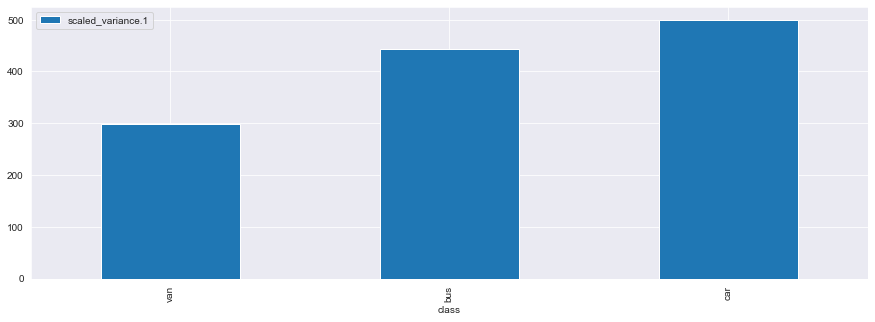

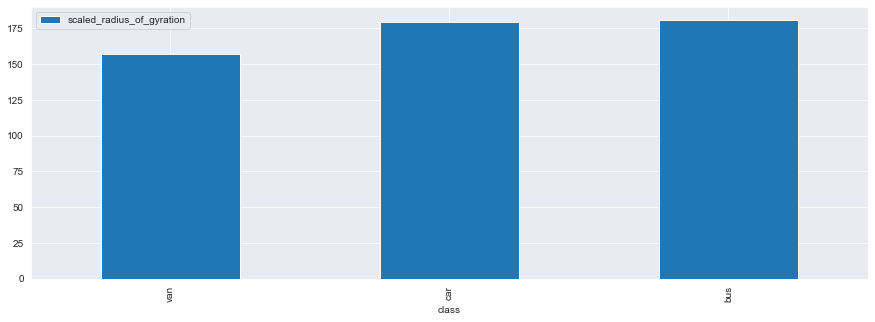

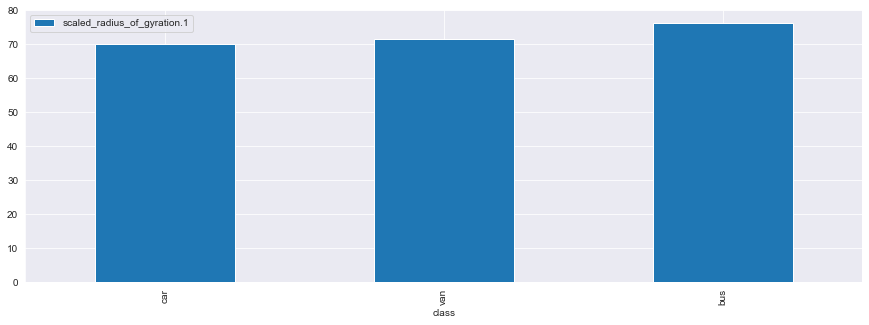

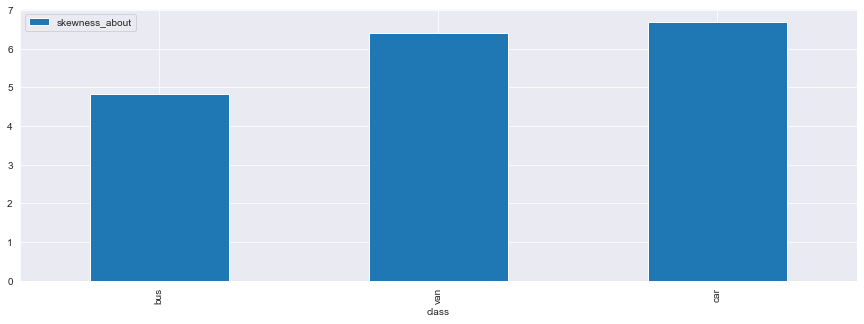

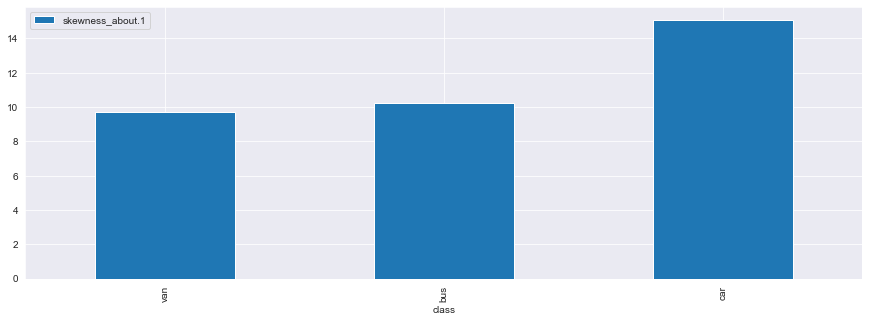

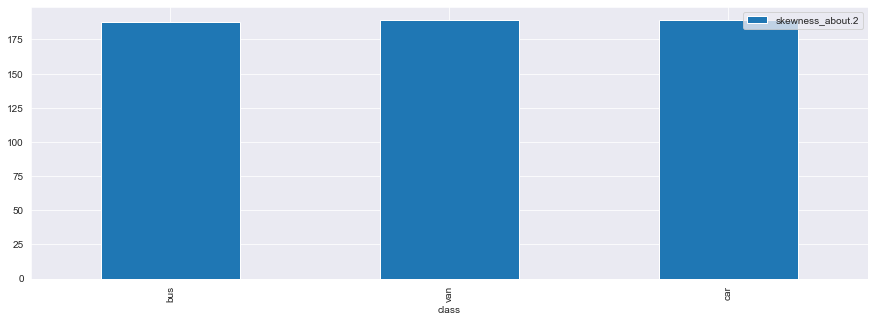

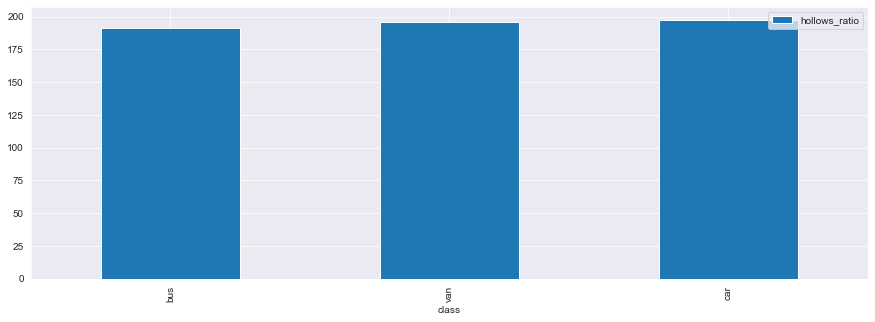

In [21]:
for i in df.select_dtypes(include=['int64','float64']).columns:
    df.groupby(by=['class'])[i].mean().reset_index().sort_values([i]).tail(10).plot(x='class',
                                                                                                           y=i,
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))

    plt.show()

- **There is no huge difference in mean values of each vehicle type**


- **Few variables has mean value higher for car and in few cases for bus.**


- **It is difficult to interpret which variable is important to particular class.**

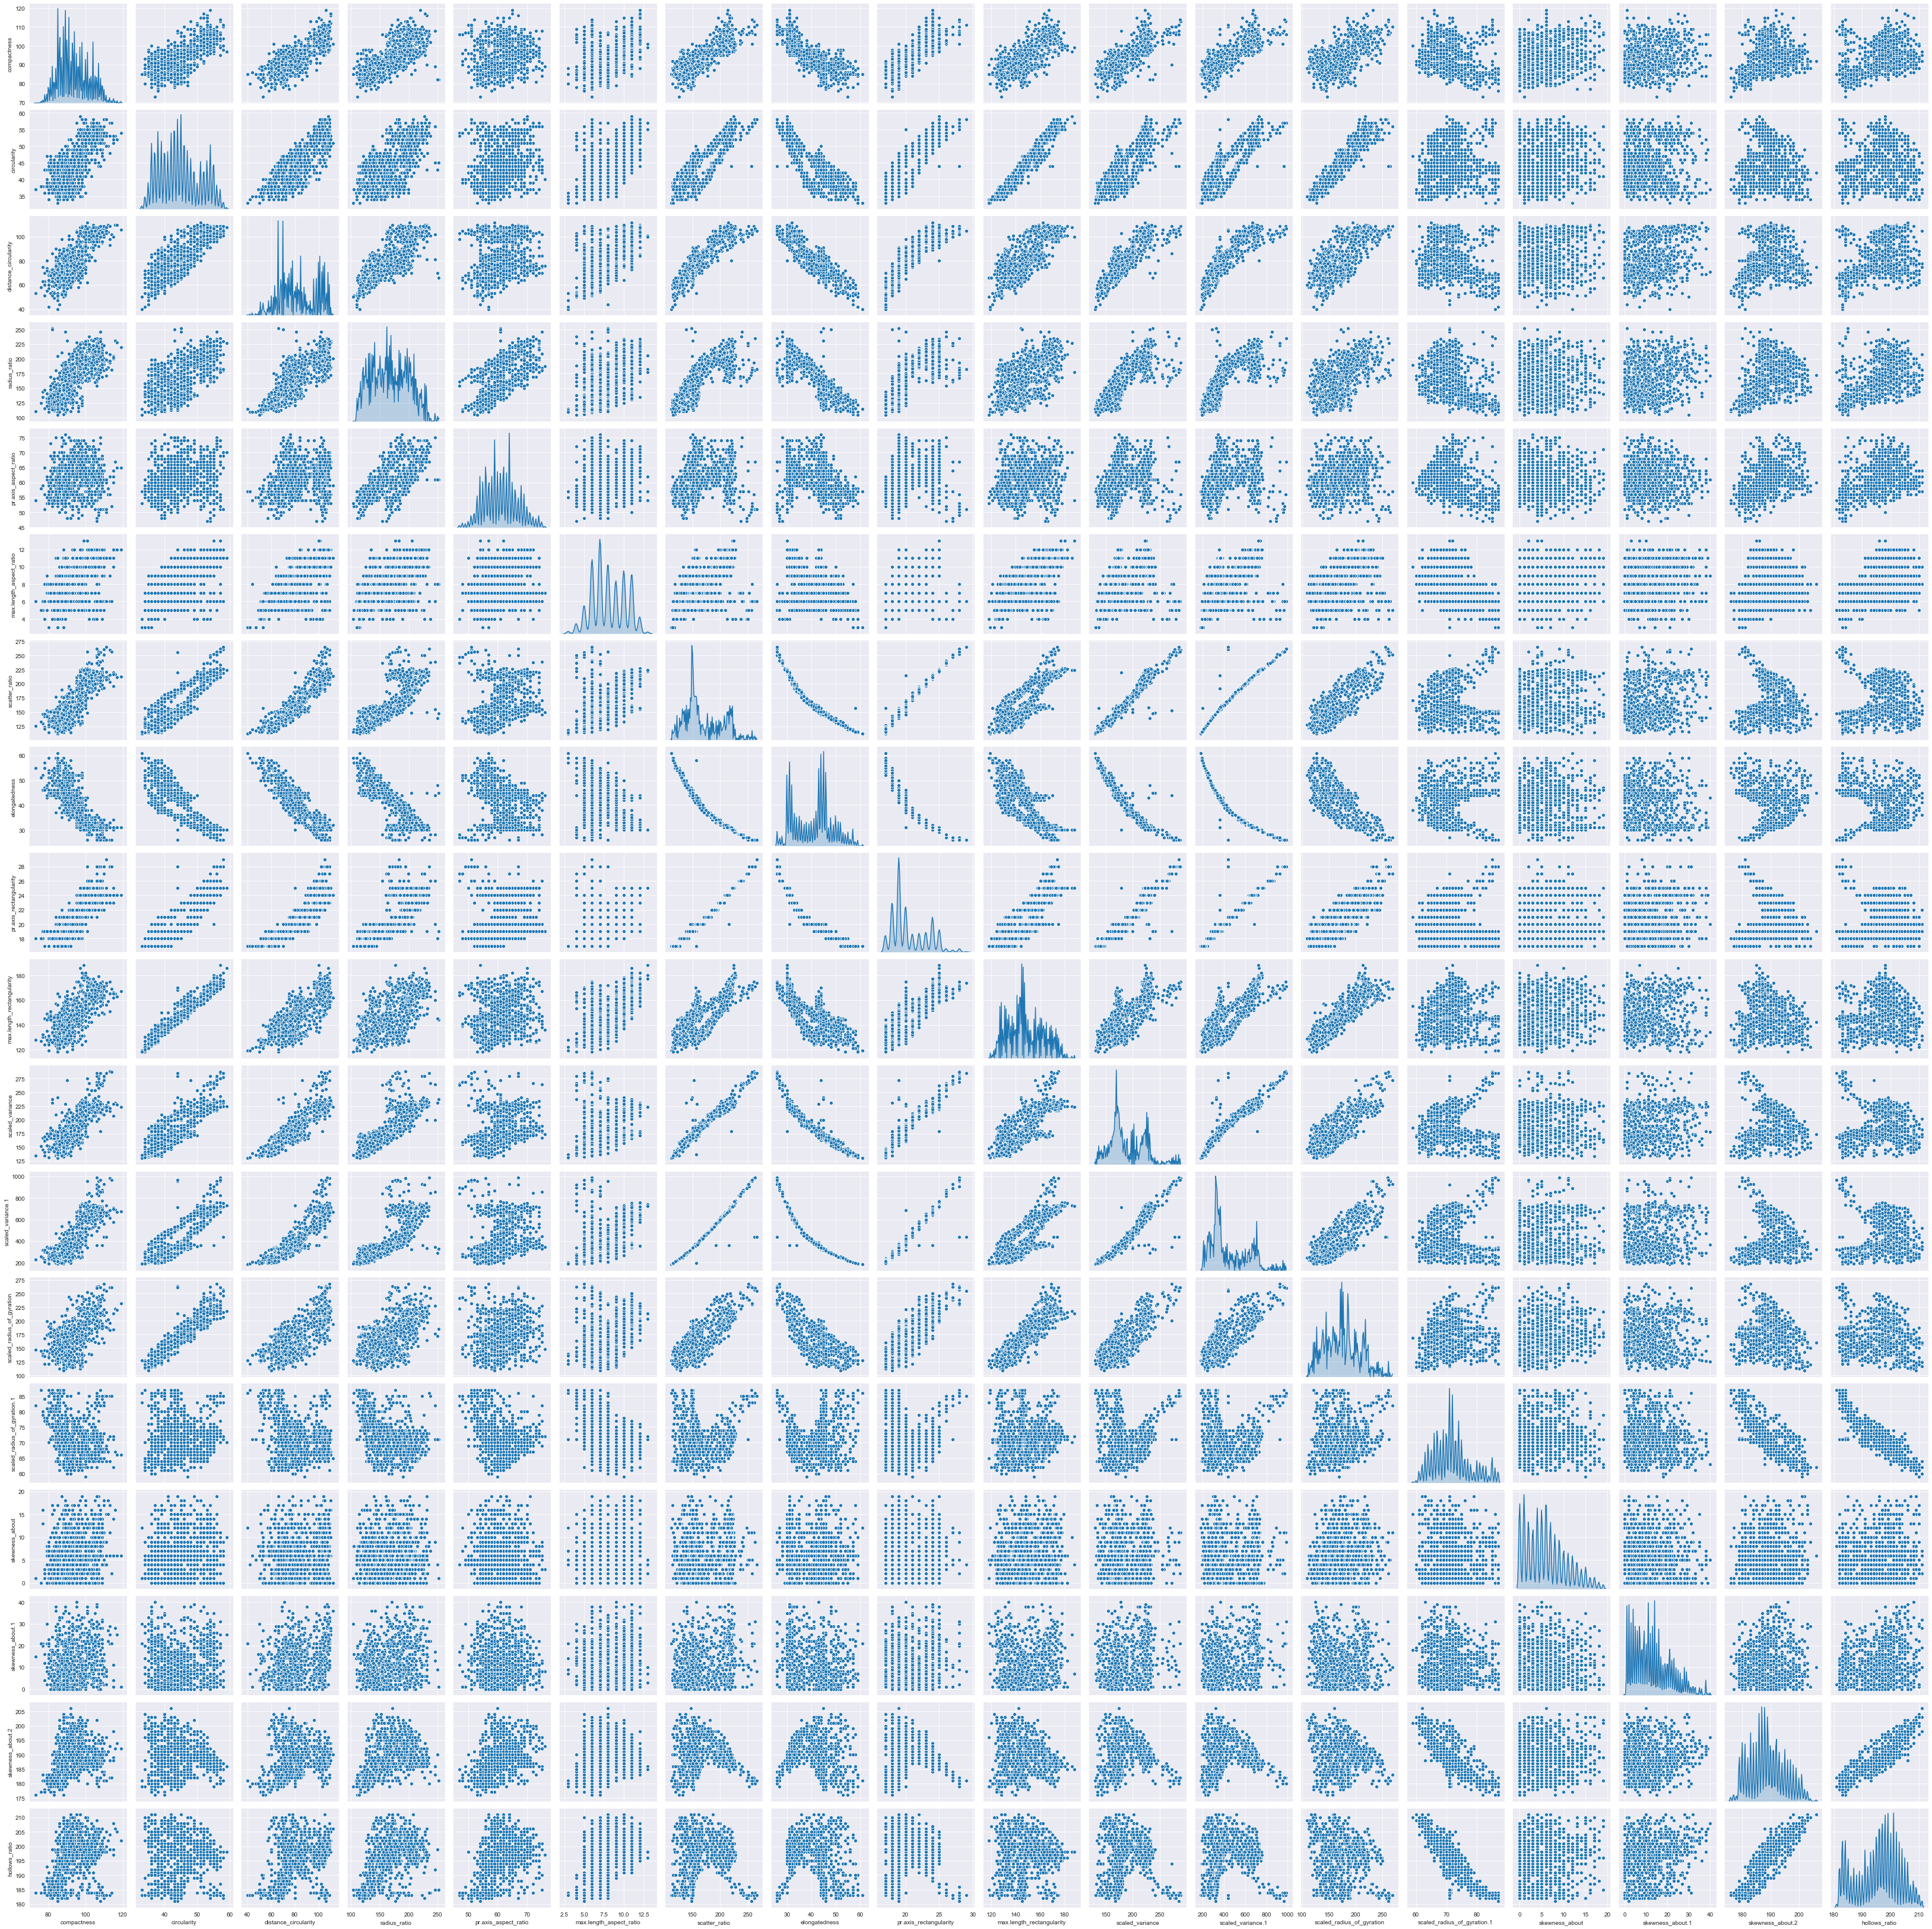

In [64]:
sns.pairplot(df,diag_kind='kde',diag_kws={'bw': 0.2})

- **We can see most of variables have positive co-relation with each other.**


- **Some Features are not correlated at all.**


- **We need to come up with efficient way of feature selection to build the model.**

# Classifier

# **Model Building with all features**

In [22]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [23]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

- **We will encode target variables before building the model.**

In [66]:
df['class'].replace({'car':0,'bus':1,'van':2},inplace=True)
df['class']=df['class'].astype('category')

**Splitting the dataset.**

In [67]:
X=df.drop('class',axis=1)
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

**Grid Search CV.**

In [68]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel':['rbf']}

grid = GridSearchCV(SVC(random_state=1), param_grid, refit = True)

# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


- **We have found best parameters using Grid search.**

In [70]:
X=df.drop('class',axis=1)
y=df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

svc = SVC(C=100,gamma=0.0001,kernel='rbf')
svc.fit(X_train, y_train)

predictions = svc.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))
#score_test=svc.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       133
           1       0.97      0.98      0.97        59
           2       0.97      0.92      0.94        62

    accuracy                           0.97       254
   macro avg       0.97      0.96      0.96       254
weighted avg       0.97      0.97      0.97       254

Accuracy on training set: 0.995
Accuracy on test set: 0.969


- **Recall value for each class seems good.**

**We will train our model in multiple folds and find out the mean score**

In [71]:
def score_model(model,params,cv):
    #smote=SMOTE(random_state=1)
    train_score=[]
    test_score=[]
    for train_fold_index,test_fold_index in cv.split(X,y):
        X_train,X_test=X.iloc[train_fold_index],X.iloc[test_fold_index]
        y_train,y_test=y.iloc[train_fold_index],y.iloc[test_fold_index]
        #X_train_res,y_train_res=smote.fit_resample(X_train,y_train)
        SVM=model(**params).fit(X_train,y_train)
        y_pred=SVM.predict(X_test)
        train_score.append(SVM.score(X_train,y_train))
        test_score.append(SVM.score(X_test,y_test))
    print('Train_score:',np.mean(np.array(train_score)))
    print('Test_score:',np.mean(np.array(test_score)))
    return np.mean(np.array(test_score))

In [72]:
cv=StratifiedKFold(n_splits=10,random_state=1)
params={'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
b=score_model(SVC,params,cv)

Train_score: 0.996847979416502
Test_score: 0.9811204481792718


**We are getting 99% mean accuracy in training data and 98% mean accuracy in test data. This is a good model.**

# Dimensional Reduction.

# **PCA**

**We will use PCA to reduce the number of dimensions.**

In [32]:
df.shape

(846, 19)

**Initially we have 18 independent columns and one dependent column.**

**Covariance Matrix**

In [34]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix.shape)

(18, 18)


**Covariance indicates the level to which two variables vary together.**

**Building PCA**

**Scaling the data**

In [74]:
li=list(df.select_dtypes(include=['int64','float64']).columns)
print(li)

['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio']


In [75]:
X[li]=X[li].apply(zscore) #replacing each continuous values with z-score value

In [76]:
pca = PCA(n_components=18) #initially we will create 18 components
pca.fit(X)

PCA(n_components=18)

**Eigen Values**

In [77]:
print(pca.explained_variance_)

[9.75305112e+00 3.34957599e+00 1.19238444e+00 1.13370702e+00
 8.84282864e-01 6.66490089e-01 3.17960298e-01 2.28674967e-01
 1.32578281e-01 7.97859112e-02 7.29893435e-02 6.41361689e-02
 3.99012267e-02 3.15282823e-02 2.85221174e-02 2.10445675e-02
 1.96567190e-02 5.03237409e-03]


**We can see 18 eigen values which is corresponds to each principal component. Eigen values tells maximum ariance explained by each principal component.**

**Eigen Vectors**

In [78]:
print((pca.components_.shape))

(18, 18)


**We have built 18 Principal components.**

**Explained Variance Ratio**

In [79]:
print(pca.explained_variance_ratio_)

[5.41195705e-01 1.85867594e-01 6.61652777e-02 6.29092744e-02
 4.90687562e-02 3.69834598e-02 1.76435810e-02 1.26891481e-02
 7.35675381e-03 4.42731120e-03 4.05017042e-03 3.55890877e-03
 2.21411456e-03 1.74950082e-03 1.58268907e-03 1.16776067e-03
 1.09074912e-03 2.79245870e-04]


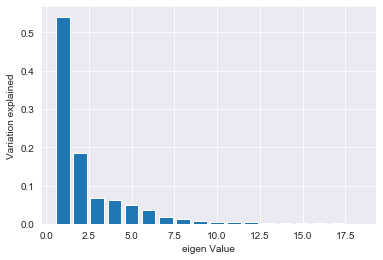

In [80]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

[0.5411957  0.7270633  0.79322858 0.85613785 0.90520661 0.94219007
 0.95983365 0.9725228  0.97987955 0.98430686 0.98835703 0.99191594
 0.99413005 0.99587956 0.99746224 0.99863001 0.99972075 1.        ]


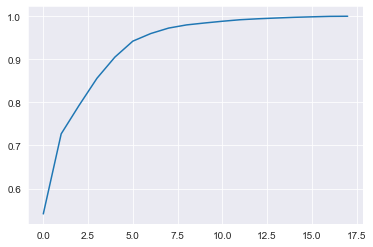

In [81]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(np.cumsum(pca.explained_variance_ratio_))

**We can see 8 components explained 97% of variance in the data.**

**Dimensionality Reduction**

**Now 8 dimensions seems very reasonable. With 8 variables we can explain over 97% of the variation in the original data!**

In [82]:
pca4 = PCA(n_components=8)
pca4.fit(X)
Xpca4 = pca4.transform(X)

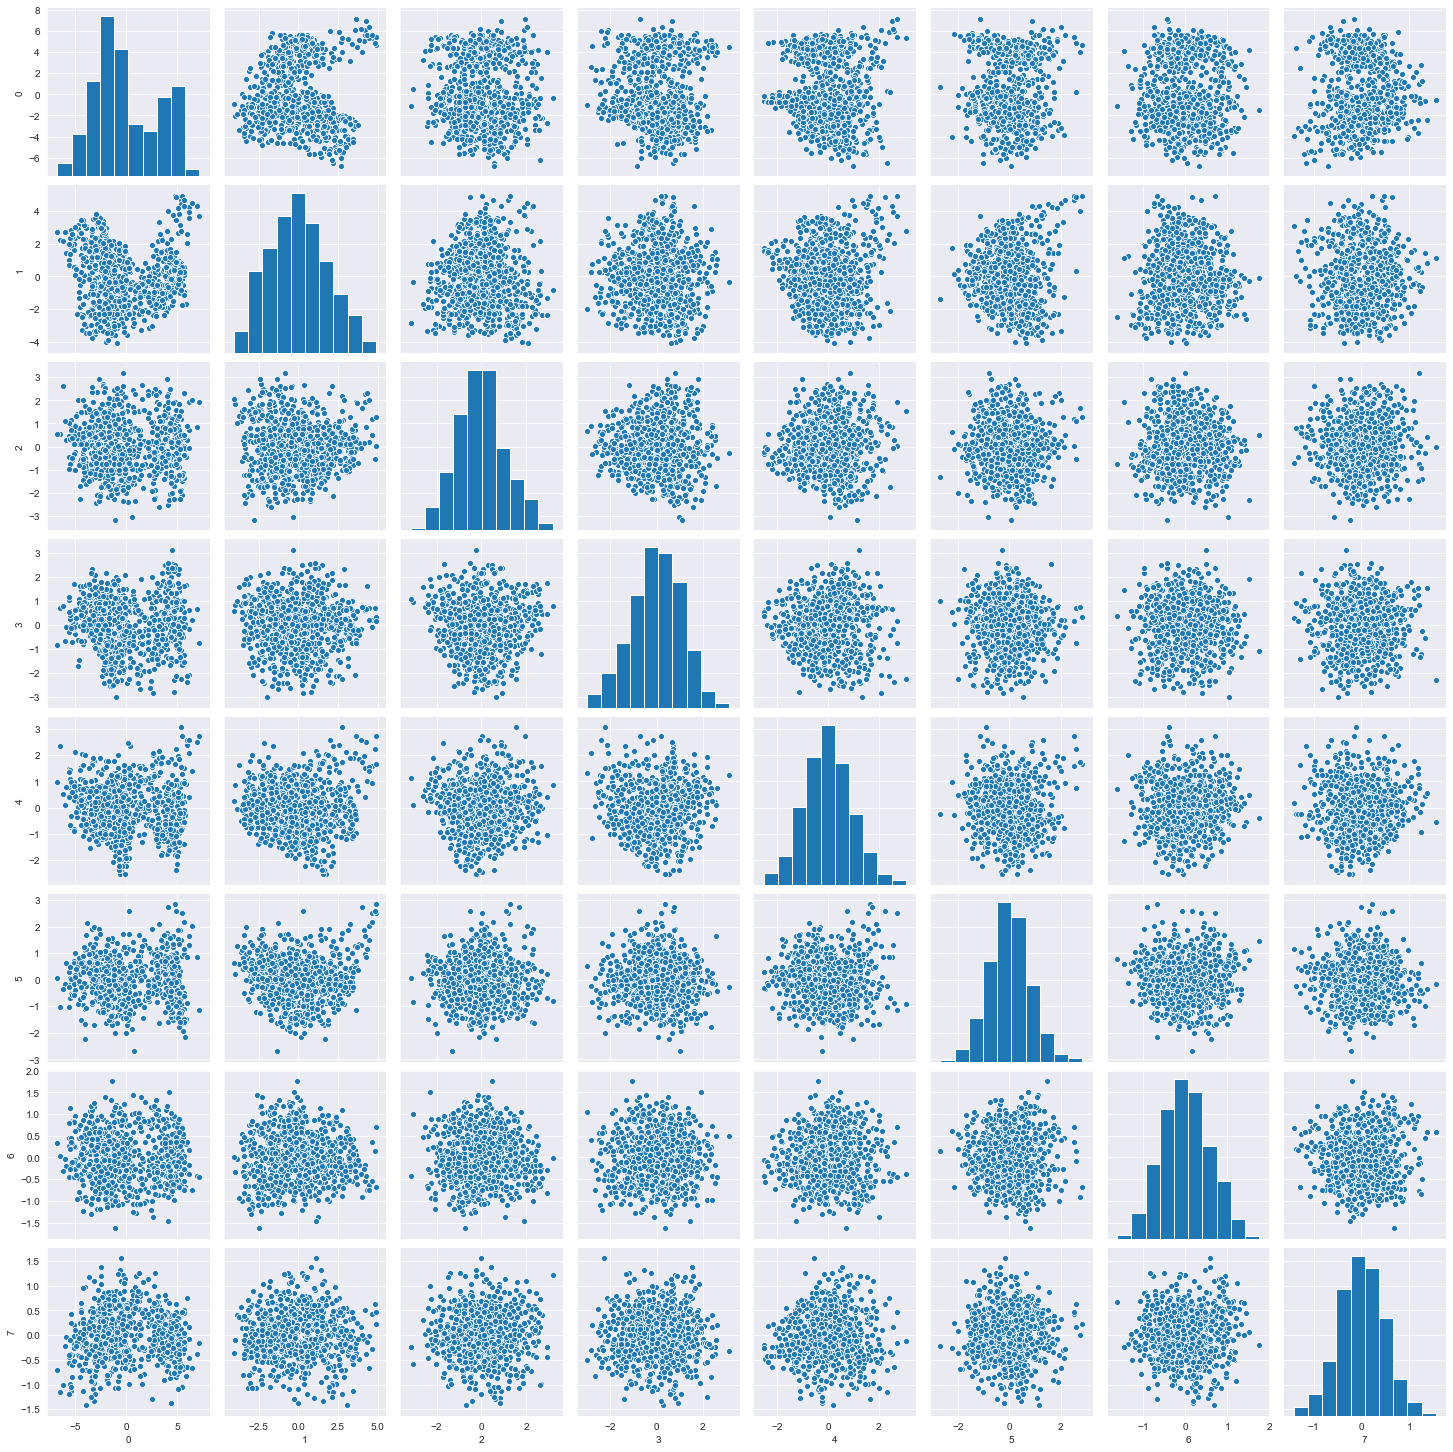

In [50]:
sns.pairplot(pd.DataFrame(Xpca4))

**We can see all the features are not correlated with each others.This is because each principal component is perpendicular to each other.**

# Classifier

**Fitting SVM With Reduced Attributes**

In [83]:
X_train, X_test, y_train, y_test = train_test_split(Xpca4, y, test_size=0.30, random_state=1)

svc = SVC(C=1000,random_state=1)
svc.fit(X_train, y_train)

predictions = svc.predict(X_test)
print(classification_report(y_test, predictions))

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       133
           1       0.96      0.90      0.93        59
           2       0.86      0.89      0.87        62

    accuracy                           0.91       254
   macro avg       0.91      0.91      0.91       254
weighted avg       0.91      0.91      0.91       254

Accuracy on training set: 1.000
Accuracy on test set: 0.913


**Training accuracy is 1 we will adjust hyper parameter to overcome this issue.**

**Grid Search CV**

In [84]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}

grid = GridSearchCV(SVC(random_state=1), param_grid, refit = True)

# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=1),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [85]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [86]:
def score_model_pca(model,params,cv):
    #smote=SMOTE(random_state=1)
    train_score=[]
    test_score=[]
    for train_fold_index,test_fold_index in cv.split(Xpca4,y):
        X_train,X_test=Xpca4[train_fold_index],Xpca4[test_fold_index]
        y_train,y_test=y.iloc[train_fold_index],y.iloc[test_fold_index]
        #X_train_res,y_train_res=smote.fit_resample(X_train,y_train)
        SVM=model(**params).fit(X_train,y_train)
        y_pred=SVM.predict(X_test)
        train_score.append(SVM.score(X_train,y_train))
        test_score.append(SVM.score(X_test,y_test))
    print('Train_score:',np.mean(np.array(train_score)))
    print('Test_score:',np.mean(np.array(test_score)))
    return np.mean(np.array(test_score))

In [87]:
cv=StratifiedKFold(n_splits=10,random_state=1)
params={'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
a=score_model_pca(SVC,params,cv)

Train_score: 0.9913318571709416
Test_score: 0.9467927170868347


**We are getting balanced score in train and test data.**

# **Conclusion**

In [88]:
result = pd.DataFrame({'SVC' : ['All attributes', '8 Principle components'],
                      'Accuracy' : [b,a]})
result

SVC  Accuracy
0          All attributes  0.981120
1  8 Principle components  0.946793

- **We are getting less accuracy in test data after attributes are reduced.**


- **We are getting 98% accuracy using 18 features and 94 % acuracy in 8 features. only 4% of accuracy is reduced but we droped 10 features. This will reduce the complexity of the model. In production if the data size size is large it will take more time to build the model so that difficulties is reduced by dimensionality reduction**


- **Dimensionality reduction helped us to reduced the features from 18 to 8.**